# Q5


In [1]:
import cmath
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#dct.py
from numpy import empty,arange,exp,real,imag,pi
from numpy.fft import rfft,irfft


# 1D DCT Type-II

def dct(y):
    N = len(y)
    y2 = empty(2*N,float)
    y2[:N] = y[:]
    y2[N:] = y[::-1]

    c = rfft(y2)
    phi = exp(-1j*pi*arange(N)/(2*N))
    return real(phi*c[:N])


######################################################################
# 1D inverse DCT Type-II

def idct(a):
    N = len(a)
    c = empty(N+1,complex)

    phi = exp(1j*pi*arange(N)/(2*N))
    c[:N] = phi*a
    c[N] = 0.0
    return irfft(c)[:N]


In [3]:
x=np.loadtxt('dow2.txt')

print(x)
#print(y)


[ 9487.8   9572.31  9594.98 ... 13676.23 13675.25 13671.92]


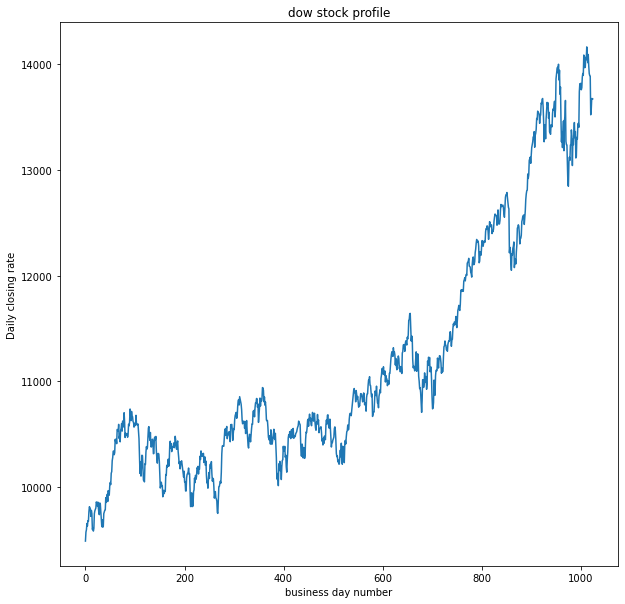

In [4]:
#plotting graph
n=len(x)
plt.figure(figsize=(10,10))
plt.plot(np.linspace(0,n,n),x)
plt.xlabel('business day number')
plt.ylabel('Daily closing rate')
plt.title('dow stock profile')
plt.show()

In [5]:
from numpy.fft import rfft, irfft

x_rfft=rfft(x)

In [6]:
#setting all but 2% data to 0

x_dct=rfft(x)
lim=int(0.02*len(x_rfft))
x_rfft[lim:]=[0]*len(x_rfft[lim:])

x_irfft=irfft(x_rfft)

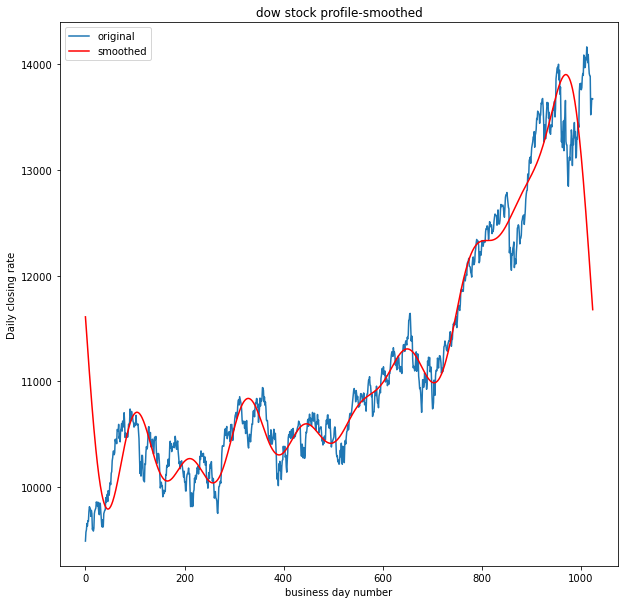

In [7]:
plt.figure(figsize=(10,10))
plt.plot(np.linspace(0,1024,1024),x, label='original')
plt.plot(np.linspace(0,1024,1024),x_irfft, color='red', label='smoothed')
plt.xlabel('business day number')
plt.ylabel('Daily closing rate')
plt.title('dow stock profile-smoothed')
plt.legend()
plt.show()


This clearly has lot of artifacts, it has lost most its variation and the artifacts are more pornounced in the end region where the tail is trying to reach up to the same value as that of the starting. This case is a lot more severe than dow1. 

In [8]:

x_dct=dct(x)
lim=int(0.02*len(x_dct))
x_dct[lim:]=[0]*len(x_dct[lim:])

x_idct=idct(x_dct)

The sqaure wave given can be regarded as an odd function which is decomposed into sine waves, The sharp corners are achieved by the continual cancellation of numerous sine waves and when we discard all but 10, then inly some first few sine terms will survive, which will make the solution wigly. The solution is trying to achieve the same value at both the ends. We can examine this by increasing the retention of the paarameters.

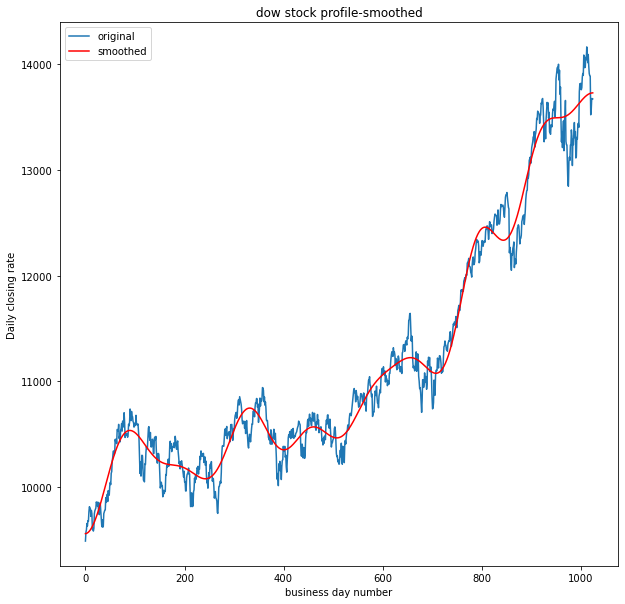

In [9]:
plt.figure(figsize=(10,10))
plt.plot(np.linspace(0,1024,1024),x, label='original')
plt.plot(np.linspace(0,1024,1024),x_idct, color='red', label='smoothed')
plt.xlabel('business day number')
plt.ylabel('Daily closing rate')
plt.title('dow stock profile-smoothed')
plt.legend()
plt.show()

#we should clearly see increasing convergence to the original function. But as predicted teh derivative at both the ends are 0.